## TensorFlow 2.0 설치
[런타임] -> [런타임 유형변경]에서 하드웨어 가속기를 꼭 GPU로 설정!

In [1]:
!pip install tensorflow-gpu==2.0.0

## Importing Libraries

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import os

print(tf.__version__)
print(keras.__version__)

2.0.0
2.2.4-tf


## Enable Eager Mode

In [0]:
if tf.__version__ < '2.0.0':
    tf.enable_eager_execution()

## Hyper Parameters

In [0]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100
n_class = 10

## MNIST/Fashion MNIST Data

In [0]:
## MNIST Dataset #########################################################
mnist = keras.datasets.mnist
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
##########################################################################

## Fashion MNIST Dataset #################################################
#mnist = keras.datasets.fashion_mnist
#class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
##########################################################################

## Datasets

In [0]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()  

In [0]:
n_train = train_images.shape[0]
n_test = test_images.shape[0]

In [0]:
# pixel값을 0~1사이 범위로 조정
train_images = train_images.astype(np.float32) / 255.
test_images = test_images.astype(np.float32) / 255.
# CNN에 입력으로 넣기 위해 3차원->4차원으로 변경(channel에 1을 추가)
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)
# label을 onehot-encoding
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# Sequential API

## Model Function

In [0]:
# Sequential API를 사용하여 model 구성
def create_model():
    model = keras.Sequential()
    model.add(keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='SAME', 
                                  input_shape=(28, 28, 1)))
    model.add(keras.layers.MaxPool2D(padding='SAME'))
    model.add(keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='SAME'))
    model.add(keras.layers.MaxPool2D(padding='SAME'))
    model.add(keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='SAME'))
    model.add(keras.layers.MaxPool2D(padding='SAME'))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(256, activation='relu'))
    model.add(keras.layers.Dropout(0.4))
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [10]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0

In [0]:
## model compie
model.compile(optimizers=keras.optimizers.Adam(learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
## training
history = model.fit(train_images, train_labels,
                   epochs=training_epochs, batch_size=batch_size,
                   validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 12s 198us/sample - loss: 0.1910 - accuracy: 0.9404 - val_loss: 0.0377 - val_accuracy: 0.9875
Epoch 2/15
60000/60000 [==============================] - 9s 157us/sample - loss: 0.0518 - accuracy: 0.9844 - val_loss: 0.0344 - val_accuracy: 0.9882
Epoch 3/15
60000/60000 [==============================] - 9s 152us/sample - loss: 0.0355 - accuracy: 0.9894 - val_loss: 0.0221 - val_accuracy: 0.9928
Epoch 4/15
60000/60000 [==============================] - 9s 153us/sample - loss: 0.0259 - accuracy: 0.9922 - val_loss: 0.0219 - val_accuracy: 0.9929
Epoch 5/15
60000/60000 [==============================] - 9s 156us/sample - loss: 0.0210 - accuracy: 0.9932 - val_loss: 0.0242 - val_accuracy: 0.9916
Epoch 6/15
60000/60000 [==============================] - 9s 152us/sample - loss: 0.0176 - accuracy: 0.9947 - val_loss: 0.0217 - val_accuracy: 0.9935
Epoch 7/15
60000/60000 [=========================

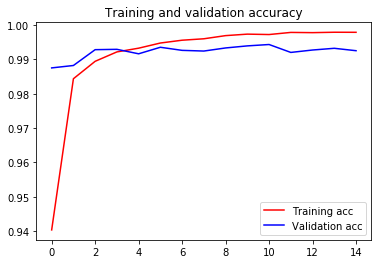

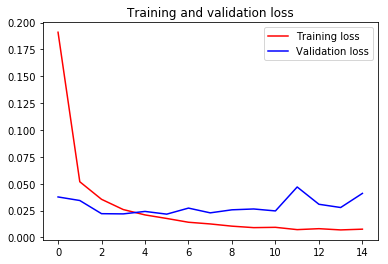

In [13]:
## training curve 확인
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# With tf.data.Dataset

In [0]:
## dataset 만들기
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(
                buffer_size=100000).batch(batch_size).repeat()
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(batch_size)

In [0]:
## 새로운 model 생성
model = create_model()

In [0]:
## model compile
model.compile(optimizers=keras.optimizers.Adam(learning_rate),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

In [17]:
## 학습 전에 결과 확인
model.evaluate(test_images, test_labels)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[2.305513930130005, 0.1127]

In [18]:
steps_per_epoch = n_train//batch_size
validation_steps = n_test//batch_size
print(steps_per_epoch, validation_steps)

600 100


In [19]:
## Training
history = model.fit(train_dataset, epochs=training_epochs, steps_per_epoch=steps_per_epoch, 
                    validation_data=test_dataset, validation_steps=validation_steps)

Train for 600 steps, validate for 100 steps
Epoch 1/15
600/600 [==============================] - 9s 16ms/step - loss: 0.1872 - accuracy: 0.9412 - val_loss: 0.0401 - val_accuracy: 0.9868
Epoch 2/15
600/600 [==============================] - 8s 14ms/step - loss: 0.0499 - accuracy: 0.9850 - val_loss: 0.0243 - val_accuracy: 0.9919
Epoch 3/15
600/600 [==============================] - 8s 13ms/step - loss: 0.0333 - accuracy: 0.9900 - val_loss: 0.0259 - val_accuracy: 0.9912
Epoch 4/15
600/600 [==============================] - 8s 13ms/step - loss: 0.0259 - accuracy: 0.9919 - val_loss: 0.0287 - val_accuracy: 0.9911
Epoch 5/15
600/600 [==============================] - 8s 13ms/step - loss: 0.0217 - accuracy: 0.9936 - val_loss: 0.0320 - val_accuracy: 0.9908
Epoch 6/15
600/600 [==============================] - 8s 13ms/step - loss: 0.0173 - accuracy: 0.9946 - val_loss: 0.0324 - val_accuracy: 0.9915
Epoch 7/15
600/600 [==============================] - 8s 13ms/step - loss: 0.0155 - accuracy: 0.99

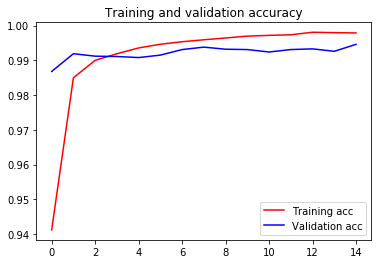

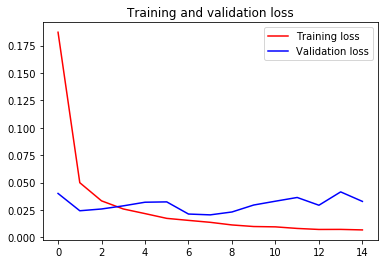

In [20]:
## training curve 확인
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img[:,:,0],cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    #plt.xticks([])
    plt.xticks(range(n_class), class_names, rotation=90)
    plt.yticks([])
    thisplot = plt.bar(range(n_class), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
 
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

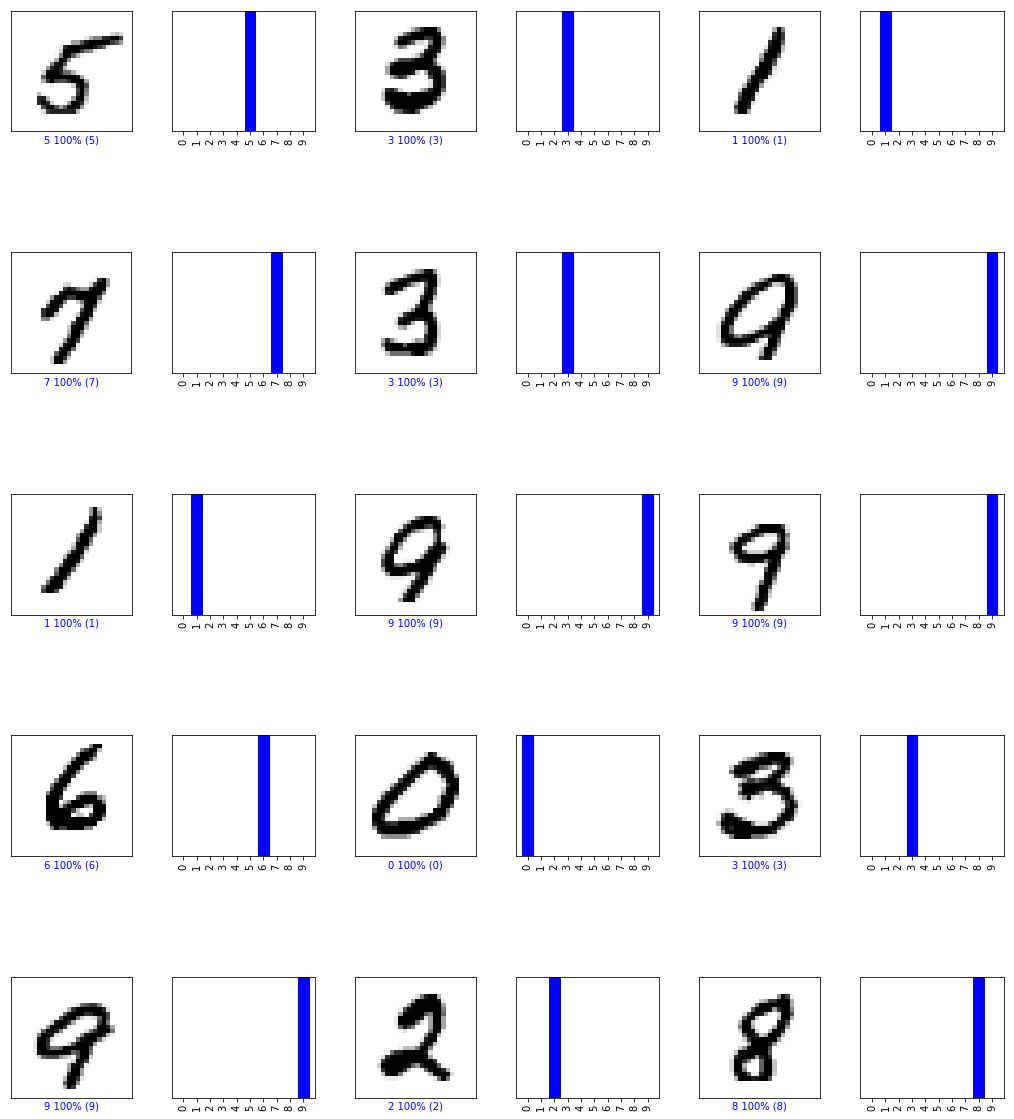

In [22]:
rnd_idx = np.random.randint(1, n_test//batch_size)
img_cnt = 0
for images, labels in test_dataset:
    img_cnt += 1
    if img_cnt != rnd_idx:
        continue
    predictions = model(images, training=False)
    num_rows = 5
    num_cols = 3
    num_images = num_rows*num_cols
    labels = tf.argmax(labels, axis=-1)
    plt.figure(figsize=(3*2*num_cols, 4*num_rows))
    plt.subplots_adjust(hspace=1.0)
    for i in range(num_images):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(i, predictions.numpy(), labels.numpy(), images.numpy())
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(i, predictions.numpy(), labels.numpy())        
    break

# Creating a Checkpoint Directory

In [0]:
cur_dir = os.getcwd()
ckpt_dir_name = 'checkpoints'
model_dir_name = 'minst_cnn_keras'

checkpoint_dir = os.path.join(cur_dir, ckpt_dir_name, model_dir_name)
os.makedirs(checkpoint_dir, exist_ok=True)

checkpoint_path = os.path.join(checkpoint_dir, model_dir_name)

# Saving Weights

In [0]:
model.save_weights(checkpoint_path)

In [25]:
!ls 'checkpoints/minst_cnn_keras'

checkpoint			     minst_cnn_keras.data-00001-of-00002
minst_cnn_keras.data-00000-of-00002  minst_cnn_keras.index


# Creating a New Model

In [26]:
new_model1 = create_model()
new_model1.compile(optimizers=keras.optimizers.Adam(learning_rate),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
new_model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)             

# Test Accuracy before Restore

In [27]:
new_model1.evaluate(test_dataset)

100/100 [==============================] - 1s 8ms/step - loss: 2.3054 - accuracy: 0.0891


[2.305404818058014, 0.0891]

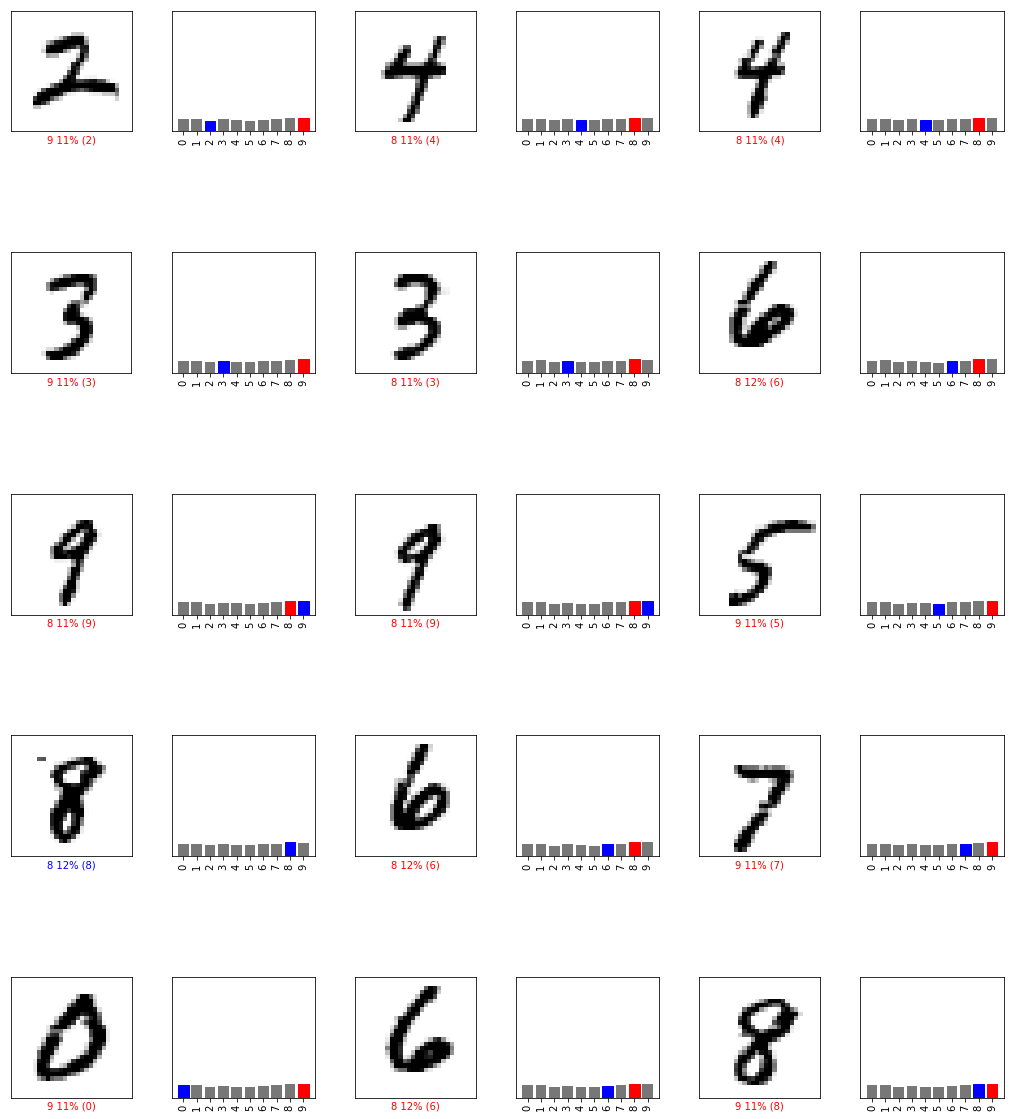

In [28]:
rnd_idx = np.random.randint(1, n_test//batch_size)
img_cnt = 0
for images, labels in test_dataset:
    img_cnt += 1
    if img_cnt != rnd_idx:
        continue
    predictions = new_model1(images, training=False)
    num_rows = 5
    num_cols = 3
    num_images = num_rows*num_cols
    labels = tf.argmax(labels, axis=-1)
    plt.figure(figsize=(3*2*num_cols, 4*num_rows))
    plt.subplots_adjust(hspace=1.0)
    for i in range(num_images):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(i, predictions.numpy(), labels.numpy(), images.numpy())
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(i, predictions.numpy(), labels.numpy())        
    break

# Restore Weights

In [29]:
new_model1.load_weights(checkpoint_path)

# Test Accuracy after Restore

In [30]:
new_model1.evaluate(test_dataset)

100/100 [==============================] - 1s 7ms/step - loss: 0.0328 - accuracy: 0.9946


[0.03279604357411981, 0.9946]

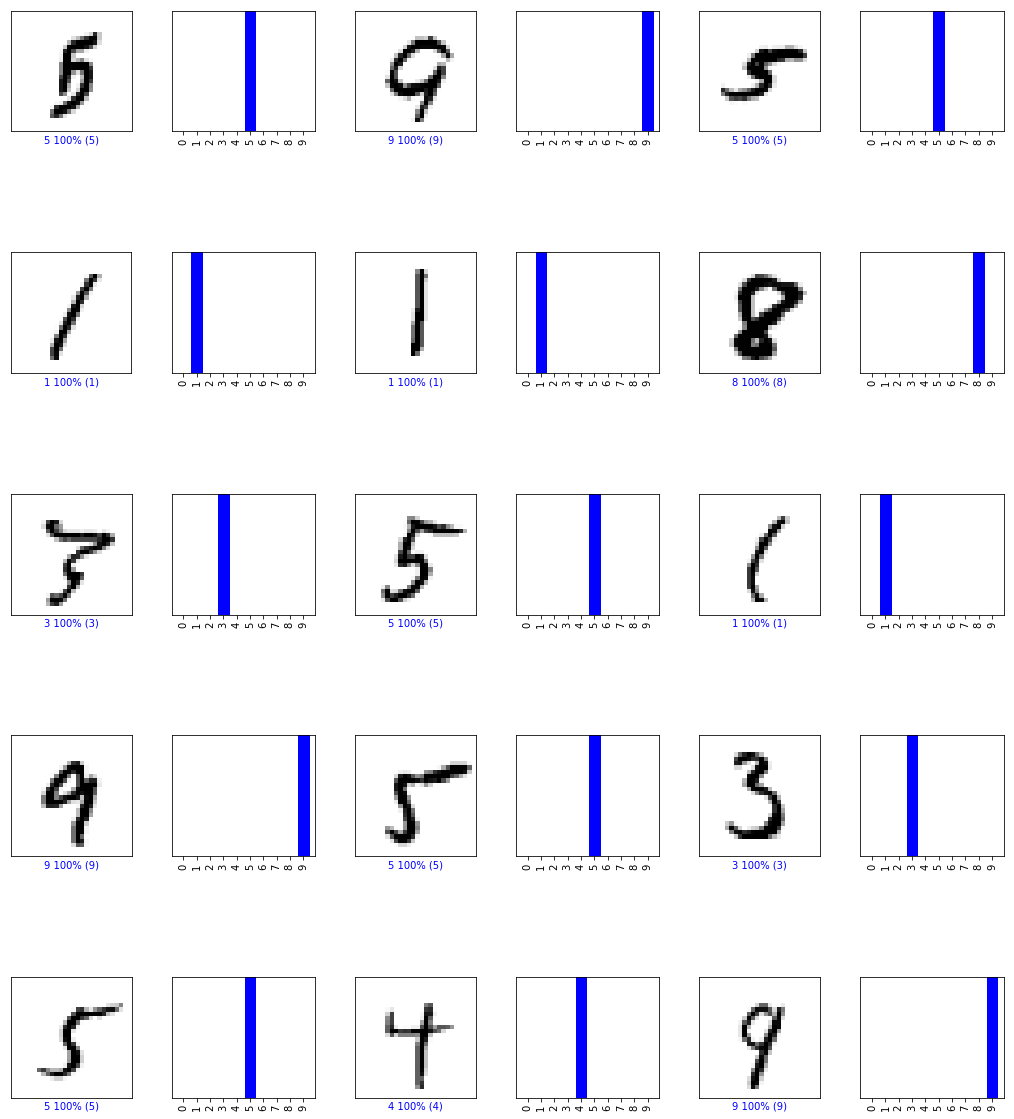

In [32]:
rnd_idx = np.random.randint(1, n_test//batch_size)
img_cnt = 0
for images, labels in test_dataset:
    img_cnt += 1
    if img_cnt != rnd_idx:
        continue
    predictions = new_model1(images, training=False)
    num_rows = 5
    num_cols = 3
    num_images = num_rows*num_cols
    labels = tf.argmax(labels, axis=-1)
    plt.figure(figsize=(3*2*num_cols, 4*num_rows))
    plt.subplots_adjust(hspace=1.0)
    for i in range(num_images):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(i, predictions.numpy(), labels.numpy(), images.numpy())
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(i, predictions.numpy(), labels.numpy())        
    break

# Whole-model Saving

## HDF5 format으로 전체 model 저장하기

In [33]:
save_dir_name = 'saved_models'
os.makedirs(save_dir_name, exist_ok=True)
hdf5_model_path = os.path.join(cur_dir, save_dir_name, 'my_model.h5')
hdf5_model_path

'/content/saved_models/my_model.h5'

In [0]:
model.save(hdf5_model_path)

In [35]:
!ls saved_models

assets	     my_model.pb	   saved_model.pb
my_model.h5  my_model.saved_model  variables


## Recreate the same model

In [0]:
new_model2 = keras.models.load_model(hdf5_model_path)

In [37]:
new_model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)             

In [38]:
new_model2.evaluate(test_dataset)

100/100 [==============================] - 1s 8ms/step - loss: 0.0328 - accuracy: 0.9946


[0.03279604357411981, 0.9946]

## saved_model format으로 저장하기(.pb)

In [0]:
saved_model_path = os.path.join(cur_dir, save_dir_name, 'my_model.pb')

In [40]:
model.save(saved_model_path, save_format='tf')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /content/saved_models/my_model.pb/assets


In [41]:
!ls saved_models

assets	     my_model.pb	   saved_model.pb
my_model.h5  my_model.saved_model  variables


## Recreate the same model

In [0]:
new_model3 = keras.models.load_model(saved_model_path)

In [43]:
new_model3.evaluate(test_dataset)

100/100 [==============================] - 1s 7ms/step - loss: 0.0318 - accuracy: 0.9946


[0.03184399721190303, 0.9946]

# Fuctional API

In [0]:
# Functional API를 사용하여 model 구성
def create_model():
    inputs = keras.Input(shape=(28, 28, 1))
    conv1 = keras.layers.Conv2D(filters=32, kernel_size=[3, 3], padding='SAME', activation='relu')(inputs)
    pool1 = keras.layers.MaxPool2D(padding='SAME')(conv1)
    conv2 = keras.layers.Conv2D(filters=64, kernel_size=[3, 3], padding='SAME', activation='relu')(pool1)
    pool2 = keras.layers.MaxPool2D(padding='SAME')(conv2)
    conv3 = keras.layers.Conv2D(filters=128, kernel_size=[3, 3], padding='SAME', activation='relu')(pool2)
    pool3 = keras.layers.MaxPool2D(padding='SAME')(conv3)
    pool3_flat = keras.layers.Flatten()(pool3)
    dense4 = keras.layers.Dense(units=256, activation='relu')(pool3_flat)
    drop4 = keras.layers.Dropout(rate=0.4)(dense4)
    logits = keras.layers.Dense(units=10, activation='softmax')(drop4)
    return keras.Model(inputs=inputs, outputs=logits)

In [0]:
model = create_model()

In [46]:
## model compile
model.compile(optimizers=keras.optimizers.Adam(learning_rate),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 4, 4, 128)         0     

In [47]:
## 학습전 accuracy 확인
model.evaluate(test_dataset)

100/100 [==============================] - 1s 8ms/step - loss: 2.2987 - accuracy: 0.1140


[2.2986707949638365, 0.114]

In [48]:
## Training
history = model.fit(train_dataset, epochs=training_epochs, steps_per_epoch=steps_per_epoch, 
                    validation_data=test_dataset, validation_steps=validation_steps)

Train for 600 steps, validate for 100 steps
Epoch 1/15
600/600 [==============================] - 10s 17ms/step - loss: 0.1852 - accuracy: 0.9410 - val_loss: 0.0384 - val_accuracy: 0.9878
Epoch 2/15
600/600 [==============================] - 8s 14ms/step - loss: 0.0509 - accuracy: 0.9840 - val_loss: 0.0339 - val_accuracy: 0.9901
Epoch 3/15
600/600 [==============================] - 8s 13ms/step - loss: 0.0355 - accuracy: 0.9894 - val_loss: 0.0355 - val_accuracy: 0.9882
Epoch 4/15
600/600 [==============================] - 8s 13ms/step - loss: 0.0266 - accuracy: 0.9923 - val_loss: 0.0316 - val_accuracy: 0.9895
Epoch 5/15
600/600 [==============================] - 8s 13ms/step - loss: 0.0222 - accuracy: 0.9935 - val_loss: 0.0245 - val_accuracy: 0.9919
Epoch 6/15
600/600 [==============================] - 8s 13ms/step - loss: 0.0177 - accuracy: 0.9949 - val_loss: 0.0257 - val_accuracy: 0.9927
Epoch 7/15
600/600 [==============================] - 8s 13ms/step - loss: 0.0152 - accuracy: 0.9

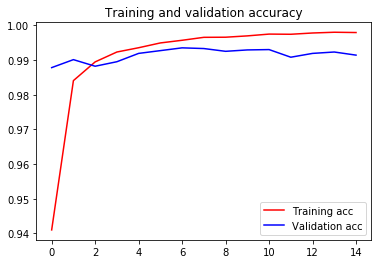

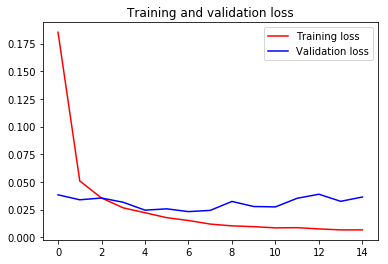

In [49]:
## training curve 확인
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

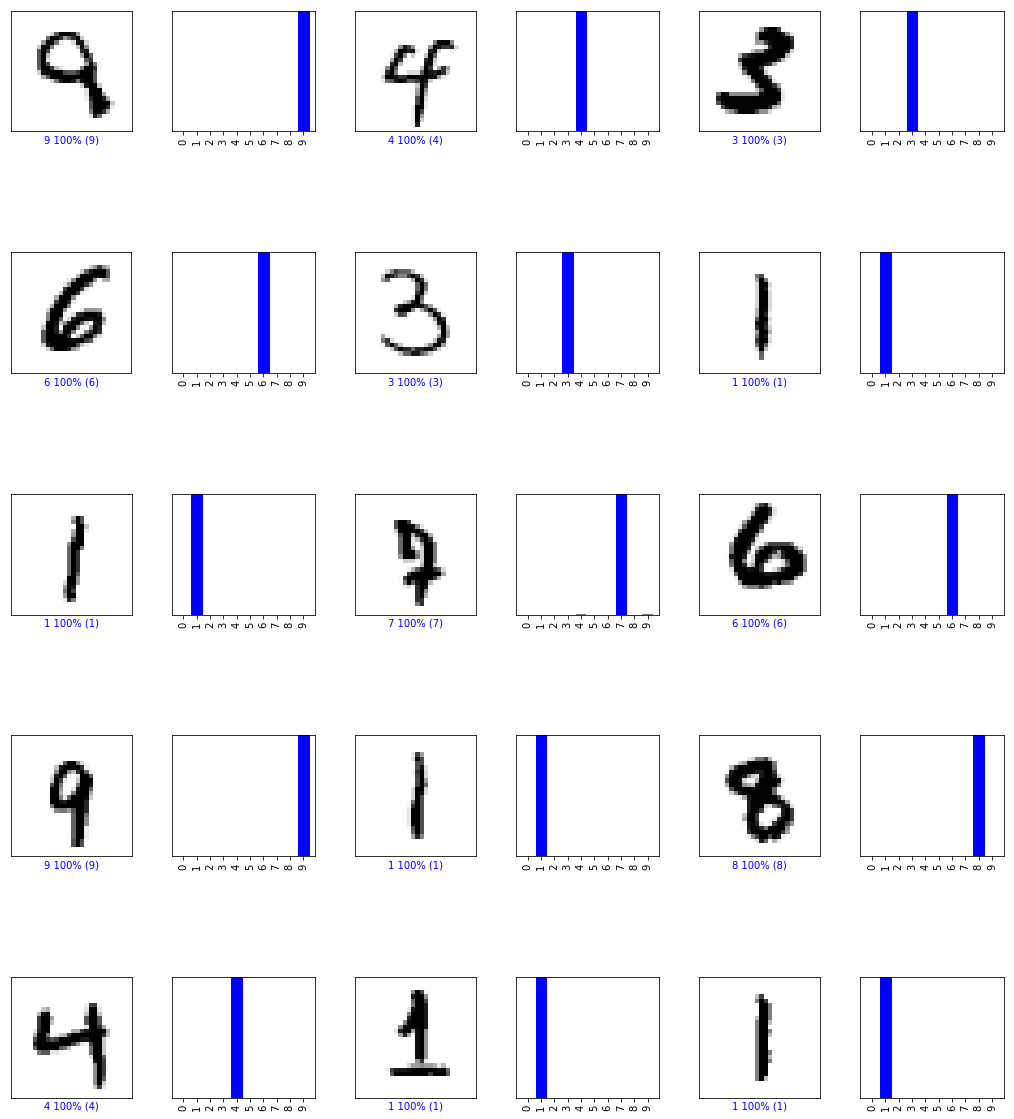

In [50]:
rnd_idx = np.random.randint(1, n_test//batch_size)
img_cnt = 0
for images, labels in test_dataset:
    img_cnt += 1
    if img_cnt != rnd_idx:
        continue
    predictions = model(images, training=False)
    num_rows = 5
    num_cols = 3
    num_images = num_rows*num_cols
    labels = tf.argmax(labels, axis=-1)
    plt.figure(figsize=(3*2*num_cols, 4*num_rows))
    plt.subplots_adjust(hspace=1.0)
    for i in range(num_images):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(i, predictions.numpy(), labels.numpy(), images.numpy())
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(i, predictions.numpy(), labels.numpy())